In [8]:
using LinearAlgebra

In [9]:
using Plots

In [10]:
# Definición de las matrices de Pauli
sigmax = [0 1.0; 1 0]
sigmay = [0 -1.0im; im 0]  # im es i=√(-1)
sigmaz = [1.0 0; 0 -1]

2×2 Matrix{Float64}:
 1.0   0.0
 0.0  -1.0

In [11]:
sigmas = Dict(1=>sigmax, 2=>sigmay, 3=>sigmaz)
function Sigma(indice, pos, totalparticulas)
    id = I(2) #[1.0 0; 0 1.0]
    mat = sigmas[indice]
    list = []
    for i in 0:totalparticulas-1
        if i == pos 
            append!(list,[mat])
        else 
            append!(list,[id])
        end
        #println("$list")
    end
    return kron(list...)
end

Sigma (generic function with 1 method)

El modelo de Ising con el que trabajaremos es:

$ H = -  \sum\limits_{i}^{N} J_i \sigma_i \sigma_{i+1} +b \sum\limits_{i}S_i  $ 

In [15]:
# Para la cadena abierta con n partículas tenemos usamos cerrada = false, para la cadena cerrada usamos cerrada = true
N = 4
e = 0.1
J_vec = rand(N)*2*e.-e.+1

function Ising_random(N, b, J_vec; cerrada = false) #Keyword Arguments
    H = 0
    totalparticulas = N
    if cerrada == false 
        M = (N - 1)
    elseif cerrada == true 
        M = N 
    end

    for i in 0:(M-1)
        H = H .+ J_vec[i+1]*(Sigma(3, mod(i,N),totalparticulas)*Sigma(3,mod((i+1),N),totalparticulas))
    end
    for j in 0:N-1
        H = H .+ b*Sigma(1,j,totalparticulas)
    end
    return H 
end

Ising_random (generic function with 1 method)

In [16]:

list = []
for b in 0:0.001:1
     Ham = Ising_random(N, b, J_vec, cerrada = true)
     Vals = eigen(Ham).values
     append!(list,map(x->[b,x],Vals))
end

In [17]:
list
x_list = [l[1] for l in list]
y_list = [l[2] for l in list]

16016-element Vector{Float64}:
 -4.0061341369273
 -4.0061341369273
 -0.29729508792870607
 -0.29729508792870607
 -0.07685280329955901
 -0.07685280329955901
 -0.010467598012229296
 -0.010467598012229296
  0.010467598012229296
  0.010467598012229296
  ⋮
 -0.0003891552978549497
  0.0003891552978622521
  0.21663946763016373
  0.8176214300167004
  2.0012316976925817
  2.022147436122112
  2.1719448768350933
  4.835390124101324
  5.2325169524767725

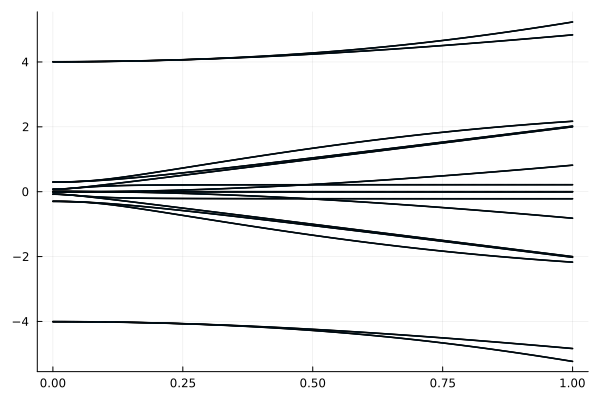

In [18]:
scatter(x_list,y_list, label = false, markersize = 0.5)
# Con el campo se rompe la simetría esférica (se rompe la degeneración)